In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-19 03:15:11,966 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-19 03:15:11,968 - settings - Setting database.user to celiib
INFO - 2021-01-19 03:15:11,969 - settings - Setting database.password to newceliipass
INFO - 2021-01-19 03:15:11,979 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-19 03:15:11,980 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-19 03:15:11,995 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-19 03:15:12,294 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-19 03:15:12,331 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-19 03:15:12,332 - settings - Setting database.user to celiib
INFO - 2021-01-19 03:15:12,333 - settings - Setting database.password to newceliipass
INFO - 2021-01-19 03:15:12,334 - settings - Setting enable_python_native_blobs to True


Sleeping 57 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-19 03:15:12,601 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 4923


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134219060901,0,0.25,30.00,0,0,1,=BLOB=,11723,24809,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8309
864691134242673681,0,0.25,30.00,0,0,1,=BLOB=,10252,20204,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9755
864691134252908410,0,0.25,30.00,0,0,1,=BLOB=,10910,22764,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.2558
864691134316523453,0,0.25,30.00,0,0,1,=BLOB=,10031,22403,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5114
864691134384033872,0,0.25,30.00,0,0,1,=BLOB=,10015,20509,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8075
864691134391593458,0,0.25,30.00,0,0,1,=BLOB=,11947,25033,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7341
864691134409056935,0,0.25,30.00,0,0,1,=BLOB=,10770,22630,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9198
864691134428609977,0,0.25,30.00,0,0,1,=BLOB=,13062,28555,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.3236
864691134441691943,0,0.25,30.00,0,0,1,=BLOB=,10681,23432,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.9167
864691134484023255,0,0.25,30.00,0,0,1,=BLOB=,21063,46992,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2306


In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition() & minnie.MultiSomaProofread2.proj()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,2780b8fac28058d79ec92cb360ccb2d6,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,32522,53503,2021-01-18 21:14:54
__neuron_split_suggestions,bd1627d7d13c83b53d92e08149722d3e,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,32396,53500,2021-01-18 21:14:16
__neuron_split_suggestions,dcd361f29ba0cff26aac4265a115c6c3,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,32459,53501,2021-01-18 21:14:32


INFO - 2021-01-19 03:15:12,786 - autopopulate - Found 49 keys to populate
INFO - 2021-01-19 03:15:12,817 - connection - Transaction started
INFO - 2021-01-19 03:15:12,819 - autopopulate - Populating: {'segment_id': 864691135065032772, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0, 'index': 0}


Populate Started


----- Working on Neuron 864691135065032772-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0]
multi_touch_limbs = []


 -------- Working on limb 0------------
Starting combinations to process = [[10 34]]


---- working on disconnecting 10 and 34
---- This disconnects S1_0 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [10, 7, 6, 16, 24, 26, 29, 31, 37, 34]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 5  6  7  9 14 15 16 23 24 25 26 29 30 31 35 37 40]
Short segments to combine = [29]


-------- Removing Segments -------------
curr_short_seg_revised = 29
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[712139. 467121. 671551.]
 [713047. 467849. 670618.]]
new_stitch_point = [71

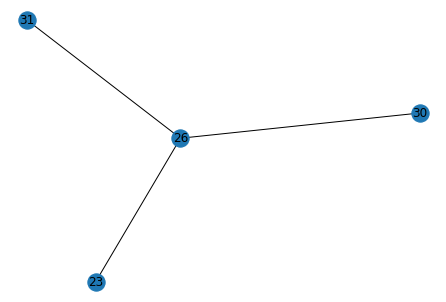

match_branches = [[26, 31]]
edges_to_delete (resolve crossover) = [[23, 26], [23, 30], [23, 31], [26, 30], [30, 31]]
edges_to_create (resolve crossover) = [[26, 31]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[23, 26], [23, 30], [23, 31], [26, 30], [30, 31]]
edges_to_create = [[26, 31]]
Number of connected components = 4
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}
Comp 1 = {2, 21, 23}
Comp 2 = {30}
Comp 3 = {29}
curr_limb_copy.deleted_edges = [[23, 26], [23, 30], [23, 31], [26, 30], [30, 31]]
curr_limb_copy.created_edges = [[26, 31]]
After get best cut: cut_edges = [[23, 26], [23, 30], [23, 31], [26, 30], [30, 31]], added_edges = [[26, 31]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end 

  Edge: [10  7]: curr_angle = 10.86
  Edge: [7 6]: curr_angle = 123.36
  Edge: [ 6 16]: curr_angle = 29.95
  Edge: [16 24]: curr_angle = 40.83
  Edge: [24 26]: curr_angle = 10.62
  Edge: [26 31]: curr_angle = 19.83
  Edge: [31 37]: curr_angle = 30.06
  Edge: [37 34]: curr_angle = 37.69

Total time for doubling_back = 1.0353474617004395
There were 1 edges that passed doubling back threshold of 100
Winning edge [7 6] had a doubling back of 123.36259804503918
***inside resolve crossover!!!!****
coordinate_branches = [5, 6, 7]
5 = red
6 = aqua
7 = purple
Angle between 5 and 6 = 32.4 
Angle between 5 and 7 = 44.63 
Angle between 6 and 7 = 105.92 
Final Matches = [[5, 6]]
matched_branches_revised = [[5, 6]]
Original graph


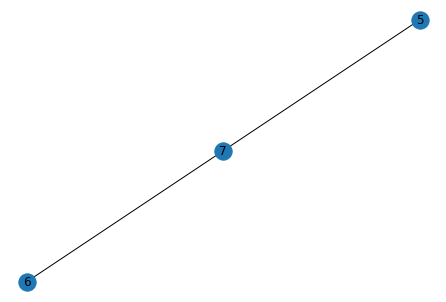

match_branches = [[5, 6]]
edges_to_delete (resolve crossover) = [[5, 7], [6, 7]]
edges_to_create (resolve crossover) = [[5, 6]]
edges_to_delete (cut_limb_network) = [array([5, 7]), array([6, 7])]
edges_to_create = [[5, 6]]
Number of connected components = 5
Comp 0 = {0, 1, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}
Comp 1 = {2, 21, 23}
Comp 2 = {30}
Comp 3 = {9, 10, 7}
Comp 4 = {29}
curr_limb_copy.deleted_edges = [[23, 26], [23, 30], [23, 31], [26, 30], [30, 31], array([5, 7]), array([6, 7])]
curr_limb_copy.created_edges = [[26, 31], [5, 6]]
After get best cut: cut_edges = [array([5, 7]), array([6, 7])], added_edges = [[5, 6]]
total_soma_paths_to_cut = [[23, 26], [23, 30], [23, 31], [26, 30], [30, 31]]
-----------counter = 1------------
 Cut iteration 2
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 5
Total number of graphs at the end of the split AFTER DIRECTIONAL =

  Edge: [143 137]: curr_angle = 91.15
  Edge: [137 148]: curr_angle = 29.15
  Edge: [148 147]: curr_angle = 24.42
  Edge: [147 181]: curr_angle = 57.75
  Edge: [181 174]: curr_angle = 163.49
  Edge: [174 164]: curr_angle = 29.26
  Edge: [164 158]: curr_angle = 41.62
  Edge: [158 144]: curr_angle = 23.57

Total time for doubling_back = 0.8503918647766113
There were 1 edges that passed doubling back threshold of 100
Winning edge [181 174] had a doubling back of 163.49309262309538
***inside resolve crossover!!!!****
coordinate_branches = [174, 181, 183]
174 = red
181 = aqua
183 = purple
Angle between 174 and 181 = 172.27 
Angle between 174 and 183 = 37.5 
Angle between 181 and 183 = 41.13 
Final Matches = []
matched_branches_revised = []
Original graph


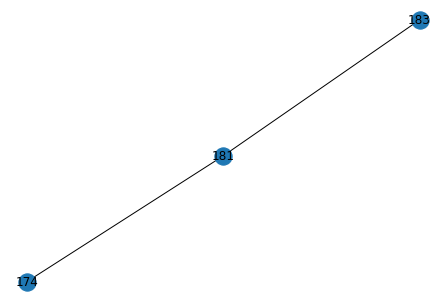

match_branches = []
edges_to_delete (resolve crossover) = [[174, 181], [174, 183], [181, 183]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([174, 181]), array([174, 183]), array([181, 183])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 74, 75, 76, 77, 78, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 95, 96, 102, 106, 107, 108, 109, 111, 112, 113, 118, 119, 123, 124, 125, 127, 129, 142, 146, 151, 153, 156, 157, 159, 168, 169, 171, 173, 175, 176, 177, 179, 180, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 220, 222, 228, 229, 230, 232, 235, 236, 237, 

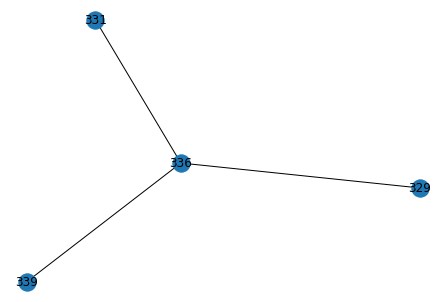

match_branches = [[329, 336], [331, 339]]
edges_to_delete (resolve crossover) = [[329, 331], [329, 339], [331, 336], [336, 339]]
edges_to_create (resolve crossover) = [[329, 336], [331, 339]]
curr_limb.deleted_edges 5 =[array([174, 181]), array([174, 183]), array([181, 183])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[329, 331], [329, 339], [331, 336], [336, 339]]
edges_to_create = [[329, 336], [331, 339]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 74, 75, 76, 77, 78, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 95, 96, 102, 106, 107, 108, 109, 111, 112, 113, 118, 119, 123, 124, 125, 127, 129, 142, 146, 151, 153, 156, 157, 159, 168, 169, 171, 173, 175, 176, 177, 179, 180, 183, 184, 185, 186, 187, 189, 190, 191, 

  Edge: [345 346]: curr_angle = 29.62
  Edge: [346 350]: curr_angle = 39.09
  Edge: [350 348]: curr_angle = 7.97
  Edge: [348 344]: curr_angle = 18.19
  Edge: [344 341]: curr_angle = 18.39
  Edge: [341 336]: curr_angle = 20.03
  Edge: [336 329]: curr_angle = 1.43
  Edge: [329 330]: curr_angle = 12.66
  Edge: [330 328]: curr_angle = 19.51
  Edge: [328 326]: curr_angle = 92.75
  Edge: [326 327]: curr_angle = 95.94
  Edge: [327 358]: curr_angle = 24.72
  Edge: [358 362]: curr_angle = 36.18
  Edge: [362 368]: curr_angle = 39.52
  Edge: [368 370]: curr_angle = 57.13

Total time for doubling_back = 0.9850983619689941

Attempting the width jump check (attempting from both sides)
  Edge: [345 346]: jump = -274.89
  Edge: [346 350]: jump = -69.34
  Edge: [350 348]: jump = -104.46
  Edge: [348 344]: jump = -66.61
  Edge: [344 341]: jump = -205.36
  Edge: [341 336]: jump = -159.52
  Edge: [336 329]: jump = -49.36
  Edge: [329 330]: jump = 58.6
  Edge: [330 328]: jump = -52.68
  Edge: [328 326]: j

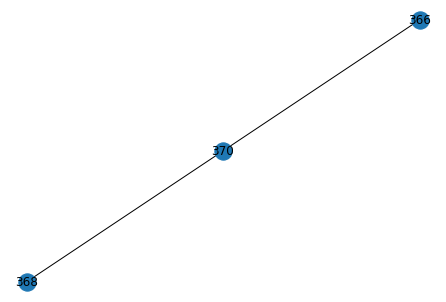

match_branches = [[366, 370]]
edges_to_delete (resolve crossover) = [[366, 368], [368, 370]]
edges_to_create (resolve crossover) = [[366, 370]]
edges_to_delete (cut_limb_network) = [array([366, 368]), array([368, 370])]
edges_to_create = [[366, 370]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 74, 75, 76, 77, 78, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 95, 96, 102, 106, 107, 108, 109, 111, 112, 113, 118, 119, 123, 124, 125, 127, 129, 142, 146, 151, 153, 156, 157, 159, 168, 169, 171, 173, 175, 176, 177, 179, 180, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 220, 222, 228, 229, 230, 232, 235, 236, 237, 2

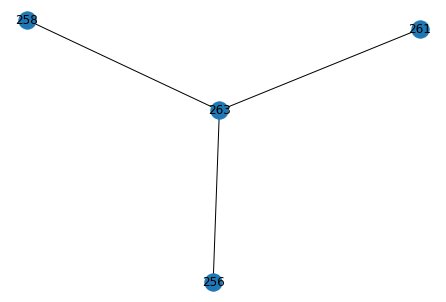

match_branches = [[261, 263]]
edges_to_delete (resolve crossover) = [[256, 258], [256, 261], [256, 263], [258, 261], [258, 263]]
edges_to_create (resolve crossover) = [[261, 263]]
curr_limb.deleted_edges 5 =[array([174, 181]), array([174, 183]), array([181, 183]), [329, 331], [329, 339], [331, 336], [336, 339], array([366, 368]), array([368, 370])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[256, 258], [256, 261], [256, 263], [258, 261], [258, 263]]
edges_to_create = [[261, 263]]
Number of connected components = 8
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 74, 75, 76, 77, 78, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 95, 96, 102, 106, 107, 108, 109, 111, 112, 113, 118, 119, 123, 124, 125, 127, 129, 142, 146, 151, 153, 156, 157, 159, 168, 169, 1

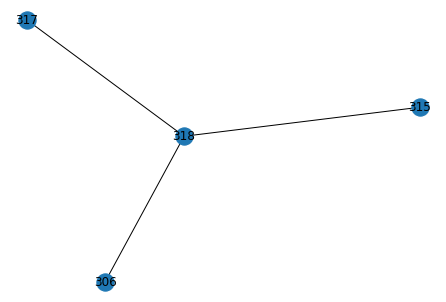

match_branches = [[306, 318], [315, 317]]
edges_to_delete (resolve crossover) = [[306, 315], [306, 317], [315, 318], [317, 318]]
edges_to_create (resolve crossover) = [[306, 318], [315, 317]]
curr_limb.deleted_edges 5 =[array([174, 181]), array([174, 183]), array([181, 183]), [329, 331], [329, 339], [331, 336], [336, 339], array([366, 368]), array([368, 370]), [256, 258], [256, 261], [256, 263], [258, 261], [258, 263]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[306, 315], [306, 317], [315, 318], [317, 318]]
edges_to_create = [[306, 318], [315, 317]]
Number of connected components = 8
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 74, 75, 76, 77, 78, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 95, 96, 102, 106, 107, 108, 109, 111, 112, 113, 118, 119,

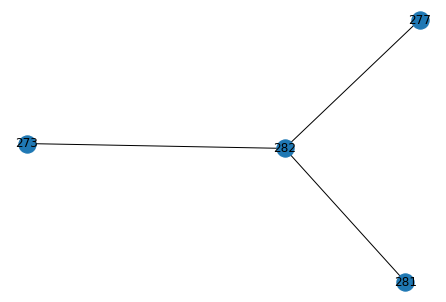

match_branches = [[273, 281], [277, 282]]
edges_to_delete (resolve crossover) = [[273, 277], [273, 282], [277, 281], [281, 282]]
edges_to_create (resolve crossover) = [[273, 281], [277, 282]]
curr_limb.deleted_edges 5 =[array([174, 181]), array([174, 183]), array([181, 183]), [329, 331], [329, 339], [331, 336], [336, 339], array([366, 368]), array([368, 370]), [256, 258], [256, 261], [256, 263], [258, 261], [258, 263], [306, 315], [306, 317], [315, 318], [317, 318]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[273, 277], [273, 282], [277, 281], [281, 282]]
edges_to_create = [[273, 281], [277, 282]]
Number of connected components = 10
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 74, 75, 76, 77, 78, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 95, 96, 

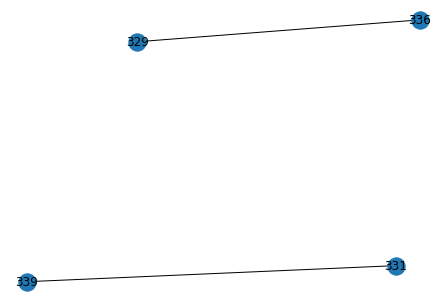

match_branches = [[329, 336], [331, 339]]
edges_to_delete (resolve crossover) = [[329, 331], [329, 339], [331, 336], [336, 339]]
edges_to_create (resolve crossover) = [[329, 336], [331, 339]]
curr_limb.deleted_edges 5 =[array([174, 181]), array([174, 183]), array([181, 183]), [329, 331], [329, 339], [331, 336], [336, 339], array([366, 368]), array([368, 370]), [256, 258], [256, 261], [256, 263], [258, 261], [258, 263], [306, 315], [306, 317], [315, 318], [317, 318], [273, 277], [273, 282], [277, 281], [281, 282]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[329, 331], [329, 339], [331, 336], [336, 339]]
edges_to_create = [[329, 336], [331, 339]]
Number of connected components = 10
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 74, 75, 76, 77, 78, 80, 

  Edge: [345 346]: curr_angle = 29.62
  Edge: [346 350]: curr_angle = 39.09
  Edge: [350 348]: curr_angle = 7.97
  Edge: [348 344]: curr_angle = 18.19
  Edge: [344 341]: curr_angle = 18.39
  Edge: [341 336]: curr_angle = 20.03
  Edge: [336 329]: curr_angle = 1.43
  Edge: [329 330]: curr_angle = 12.66
  Edge: [330 328]: curr_angle = 19.51
  Edge: [328 325]: curr_angle = 11.29
  Edge: [325 318]: curr_angle = 18.64
  Edge: [318 306]: curr_angle = 6.08
  Edge: [306 304]: curr_angle = 18.45
  Edge: [304 295]: curr_angle = 69.22
  Edge: [295 289]: curr_angle = 14.63
  Edge: [289 282]: curr_angle = 12.08
  Edge: [282 277]: curr_angle = 21.66
  Edge: [277 276]: curr_angle = 142.49
  Edge: [276 280]: curr_angle = 76.58
  Edge: [280 287]: curr_angle = 46.42
  Edge: [287 352]: curr_angle = 21.69
  Edge: [352 361]: curr_angle = 22.88
  Edge: [361 364]: curr_angle = 9.74
  Edge: [364 371]: curr_angle = 21.75
  Edge: [371 378]: curr_angle = 23.07
  Edge: [378 380]: curr_angle = 17.77
  Edge: [380 38

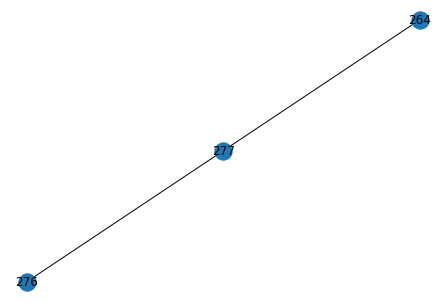

match_branches = [[264, 276]]
edges_to_delete (resolve crossover) = [[264, 277], [276, 277]]
edges_to_create (resolve crossover) = [[264, 276]]
edges_to_delete (cut_limb_network) = [array([264, 277]), array([276, 277])]
edges_to_create = [[264, 276]]
Number of connected components = 11
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 74, 75, 76, 77, 78, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 95, 96, 102, 106, 107, 108, 109, 111, 112, 113, 118, 119, 123, 124, 125, 127, 151, 153, 159, 168, 169, 171, 173, 175, 176, 177, 179, 180, 183, 184, 185, 186, 187, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 220, 222, 228, 232, 235, 236, 240, 243, 245, 246, 251, 253, 259, 265, 271, 274, 

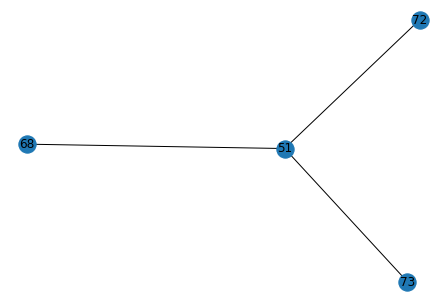

match_branches = [[51, 72], [68, 73]]
edges_to_delete (resolve crossover) = [[51, 68], [51, 73], [68, 72], [72, 73]]
edges_to_create (resolve crossover) = [[51, 72], [68, 73]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[51, 68], [51, 73], [68, 72], [72, 73]]
edges_to_create = [[51, 72], [68, 73]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 45, 46, 47, 48, 49, 50, 51, 54, 55, 58, 62, 67, 72, 75, 76}
Comp 1 = {35, 42, 43, 44, 52, 53, 56, 57, 59, 60, 61, 63, 64, 65, 66, 68, 69, 70, 71, 73, 74}
curr_limb_copy.deleted_edges = [[51, 68], [51, 73], [68, 72], [72, 73]]
curr_limb_copy.created_edges = [[51, 72], [68, 73]]
After get best cut: cut_edges = [[51, 68], [51, 73], [68, 72], [72, 73]], added_edges = [[51, 72], [68, 73]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iterat

  Edge: [34 32]: curr_angle = 36.92
  Edge: [32 36]: curr_angle = 63.7
  Edge: [36 51]: curr_angle = 20.55
  Edge: [51 72]: curr_angle = 13.87

Total time for doubling_back = 0.27776455879211426

Attempting the width jump check (attempting from both sides)
  Edge: [34 32]: jump = 79.58
  Edge: [32 36]: jump = -583.06
  Edge: [36 51]: jump = -199.34
  Edge: [51 72]: jump = -26.6
Total time for width = 0.25023722648620605
Path starting at 34 had err_edges: []
  Edge: [72 51]: jump = 26.6
  Edge: [51 36]: jump = 199.34
  Edge: [36 32]: jump = 583.06
Adding error edge [36 32] because width jump was 583.0607751062694
  Edge: [32 34]: jump = -79.58
Total time for width = 0.25176572799682617
Path starting at 72 had err_edges: [[36, 32]]
first_error_sizes = [-inf, 583.0607751062694], winning_path = 1
***inside resolve crossover!!!!****
coordinate_branches = [28, 32, 36]
28 = red
32 = aqua
36 = purple
Angle between 28 and 32 = 24.9 
Angle between 28 and 36 = 95.18 
Angle between 32 and 36 = 60.

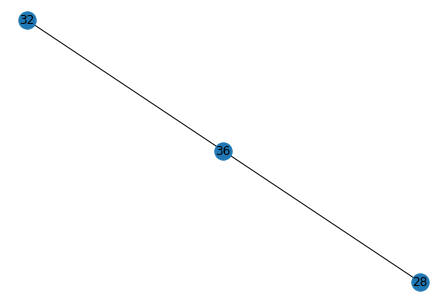

match_branches = [[28, 32]]
edges_to_delete (resolve crossover) = [[28, 36], [32, 36]]
edges_to_create (resolve crossover) = [[28, 32]]
edges_to_delete (cut_limb_network) = [array([28, 36]), array([32, 36])]
edges_to_create = [[28, 32]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 45, 46, 48, 49, 50, 54, 55, 58, 62, 67, 75, 76}
Comp 1 = {72, 51, 36, 47}
Comp 2 = {35, 42, 43, 44, 52, 53, 56, 57, 59, 60, 61, 63, 64, 65, 66, 68, 69, 70, 71, 73, 74}
curr_limb_copy.deleted_edges = [[51, 68], [51, 73], [68, 72], [72, 73], array([28, 36]), array([32, 36])]
curr_limb_copy.created_edges = [[51, 72], [68, 73], [28, 32]]
After get best cut: cut_edges = [array([28, 36]), array([32, 36])], added_edges = [[28, 32]]
total_soma_paths_to_cut = [[51, 68], [51, 73], [68, 72], [72, 73]]
-----------counter = 1------------
 Cut iteration 2
Total number of grap

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")